In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import datatable as dt
import evalml
import seaborn as sns
from sklearn import preprocessing
from category_encoders import TargetEncoder
te = TargetEncoder()

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab data/train_s3TEQDk.csv')
data=data.drop(data[data['Credit_Product'].isnull()].index)
data['Risk']=data['Vintage']/data['Age']
data['Poshness']=te.fit_transform(data['Region_Code'],data['Avg_Account_Balance'])


data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Risk,Poshness
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,0.589041,1.460240e+06
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,1.066667,9.768745e+05
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,0.464286,1.460240e+06
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,0.558824,6.924174e+05
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,1.100000,9.485571e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245719,DQ48DATH,Female,38,RG280,Salaried,X2,13,Yes,354665,No,0,0.342105,7.777738e+05
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0,0.555556,1.460240e+06
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0,0.500000,8.827368e+05
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0,1.107143,8.543590e+05


<AxesSubplot:>

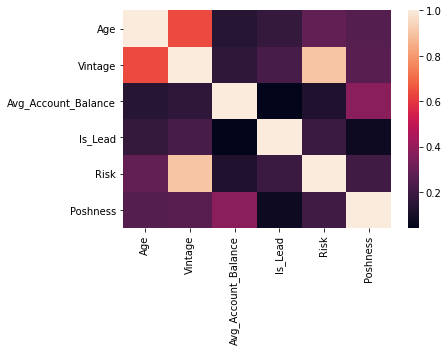

In [ ]:
data.corr()
sns.heatmap(data.corr())

In [ ]:
X=data.drop(['Is_Lead','ID'], axis=1)  
y=data.Is_Lead
X.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Risk
0,Female,73,RG268,Other,X3,43,No,1045696,No,0.589041
1,Female,30,RG277,Salaried,X1,32,No,581988,No,1.066667
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.464286
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0.558824
4,Female,30,RG282,Salaried,X1,33,No,886787,No,1.100000


In [ ]:
X_train,X_test,y_train,y_test=evalml.preprocessing.split_data(X,y,problem_type='binary')

In [ ]:
X_train.head()

Data Column,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Risk,Poshness
Physical Type,category,Int64,category,category,category,Int64,category,Int64,category,float64,float64
Logical Type,Categorical,Integer,Categorical,Categorical,Categorical,Integer,Categorical,Integer,Categorical,Double,Double
Semantic Tag(s),['category'],['numeric'],['category'],['category'],['category'],['numeric'],['category'],['numeric'],['category'],['numeric'],['numeric']
818,Female,81,RG255,Other,X3,133,No,1621606,Yes,1.641975,8.653570e+05
31657,Male,29,RG251,Salaried,X1,14,No,516903,No,0.482759,7.328320e+05
160309,Female,31,RG275,Salaried,X1,25,Yes,2339801,No,0.806452,8.524428e+05
1133,Female,28,RG275,Salaried,X1,21,No,803411,No,0.750000,8.524428e+05
27406,Female,52,RG276,Self_Employed,X2,91,No,461776,No,1.750000,1.053188e+06


In [ ]:
from evalml import AutoMLSearch

In [ ]:

automl=AutoMLSearch(X_train=X_train,y_train=y_train,problem_type='binary',max_batches=1,optimize_thresholds=True)

Generating pipelines to search over...
8 pipelines ready for search.


In [ ]:

automl.search()


*****************************
* Beginning pipeline search *
*****************************

Optimizing for Log Loss Binary. 
Lower score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: extra_trees, random_forest, catboost, decision_tree, linear_model, xgboost, lightgbm



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 5.307

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Classifier w/ Imputer + One Hot Encoder + Undersampler + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.365
Decision Tree Classifier w/ Imputer + One Hot Encoder + Undersampler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.396
Random Forest Classifier w/ Imputer + One Hot Encoder + Undersampler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.360
LightGBM Classifier w/ Imputer + One Hot Encoder + Undersampler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.344
Logistic Regression Classifier w/ Imputer + One Hot Encoder + Undersampler +

In [ ]:
automl.rankings

,id,pipeline_name,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,4,LightGBM Classifier w/ Imputer + One Hot Encod...,0.344113,NaN,0.344113,93.516073,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,6,XGBoost Classifier w/ Imputer + One Hot Encode...,0.344157,NaN,0.344157,93.515243,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,3,Random Forest Classifier w/ Imputer + One Hot ...,0.359946,NaN,0.359946,93.217739,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,5,Logistic Regression Classifier w/ Imputer + On...,0.364042,NaN,0.364042,93.140559,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,1,Elastic Net Classifier w/ Imputer + One Hot En...,0.365408,NaN,0.365408,93.114833,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,7,Extra Trees Classifier w/ Imputer + One Hot En...,0.366334,NaN,0.366334,93.097383,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,2,Decision Tree Classifier w/ Imputer + One Hot ...,0.395834,NaN,0.395834,92.541526,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,8,CatBoost Classifier w/ Imputer + Undersampler,0.570269,NaN,0.570269,89.254751,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,5.307171,NaN,5.307171,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [ ]:
best_pipeline = automl.best_pipeline

In [ ]:
automl.describe_pipeline(automl.rankings.iloc[7]["id"])


*************************************************
* CatBoost Classifier w/ Imputer + Undersampler *
*************************************************

Problem Type: binary
Model Family: CatBoost

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Undersampler
	 * sampling_ratio : 0.25
	 * min_samples : 100
	 * min_percentage : 0.1
	 * sampling_ratio_dict : None
3. CatBoost Classifier
	 * n_estimators : 10
	 * eta : 0.03
	 * max_depth : 6
	 * bootstrap_type : None
	 * silent : True
	 * allow_writing_files : False

Training
Training for binary problems.
Total training time (including CV): 6.1 seconds

Cross Validation
----------------
            Log Loss Binary MCC Binary   AUC Precision    F1 Balanced Accuracy Binary Accuracy Binary Sensitivity at Low Alert Rates # Training # Validation
0                     0.570      0.318 0.788     0.502 0.390                

In [ ]:
scores = best_pipeline.score(X_test, y_test,  objectives=evalml.objectives.get_core_objectives('binary'))
print(scores['AUC'])

0.8047318103772925


In [ ]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                           problem_type='binary',
                           objective='auc',
                           additional_objectives=['precision'],                    
                           optimize_thresholds=True)
automl_auc.search() 

Using default limit of max_batches=1.

Generating pipelines to search over...
8 pipelines ready for search.

*****************************
* Beginning pipeline search *
*****************************

Optimizing for AUC. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: extra_trees, random_forest, catboost, decision_tree, linear_model, xgboost, lightgbm



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean AUC: 0.500

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Classifier w/ Imputer + One Hot Encoder + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean AUC: 0.722
Decision Tree Classifier w/ Imputer + One Hot Encoder:
	Starting cross validation
	Finished cross validation - mean AUC: 0.748
Random Forest Classifier w/ Imputer + One Hot Encoder:
	Starting cross validation
	Finished cross validation - mean AUC: 0.773
LightGBM Classifier w/ Imputer + One Hot Encoder:
	Starting cross validation
	Finished cross validation - mean AUC: 0.785
Logistic Regression Classifier w/ Imputer + One Hot Encoder + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean AUC: 0.731
XGBoost Classifier w/ Imputer + One Hot Encod

In [ ]:
best_pipeline.feature_importance

,feature,importance
0,Avg_Account_Balance,617
1,Age,519
2,Risk,482
3,Vintage,436
4,Occupation_Salaried,165
5,Is_Active_Yes,111
6,Channel_Code_X1,78
7,Occupation_Other,77
8,Credit_Product_Yes,70
9,Gender_Female,56
